# Image Classification on Fashion MNIST Dataset using Convolutional Neural Network


<p align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png" />
  Image source: https://www.kaggle.com/
</p>

- Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes. 
<br><br>
- The 10 classes are as follows:  
  - 0 => T-shirt/top
  - 1 => Trouser
  - 2 => Pullover
  - 3 => Dress
  - 4 => Coat
  - 5 => Sandal
  - 6 => Shirt
  - 7 => Sneaker
  - 8 => Bag
  - 9 => Ankle boot
<br><br>
- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. 

## Library imports

In [1]:
import random
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(f"Using Tensorflow version as - {tf.__version__}")

Using Tensorflow version as - 2.9.1


In [2]:
# Note this code is only valid if GPU is being used for training

# Before we run the parameter tuning, we will work with little gpu memory allocation
# we will only use that much of memory of gpu as it is needed - allow the growth of gpu memory as it is needed

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


## Load the dataset

In [3]:
# Get the datsets directory
DATASETS_DIR = os.environ.get("DATASET_DIR")


In [4]:
DATA_DIR = os.path.join(DATASETS_DIR, "fashion_mnist", "fashion-mnist_train.csv" )
fashion_train = pd.read_csv(DATA_DIR)

# Check the data load
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
DATA_DIR = os.path.join(DATASETS_DIR, "fashion_mnist", "fashion-mnist_test.csv" )
fashion_test = pd.read_csv(DATA_DIR)

# Check the data load
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(f"Shape of the training set - {fashion_train.shape}")
print(f"Shape of the testing set - {fashion_test.shape}")

Shape of the training set - (60000, 785)
Shape of the testing set - (10000, 785)


In [7]:
# Check for any missing values
sum(fashion_train.isna().sum())

0

## Data Visualization

In [8]:
# Conversion of dataframes to array
fashion_train = fashion_train.values
fashion_test = fashion_test.values

label of the image is : 4


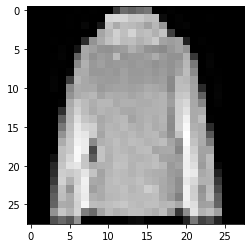

In [9]:
# We will now visualise some images

# We will take any random index between 1 and 60,000
index = random.randint(1, 60000)
plt.imshow(fashion_train[index, 1:].reshape((28, 28)), cmap='gray') # reshape and plot the image

print(f"label of the image is : {fashion_train[index, 0]}")

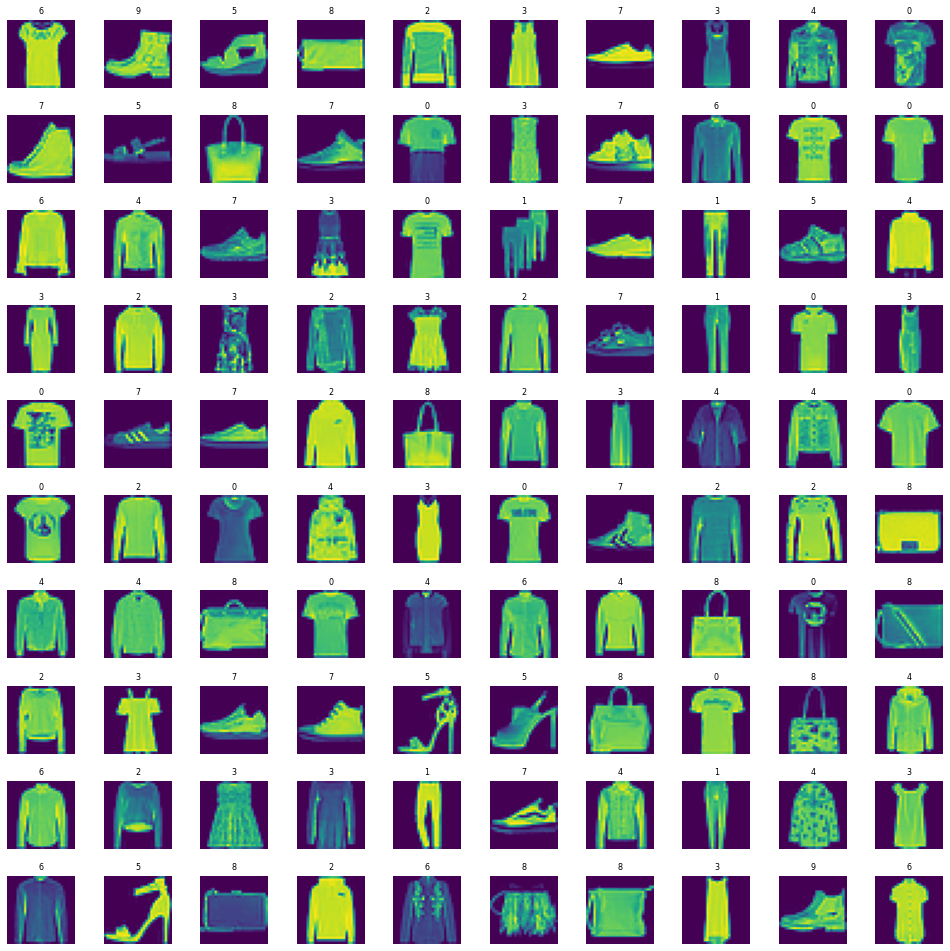

In [10]:
# Now we will view more images in a grid format - 10 X 10 images

# dimensions of the grid we want to view
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))

# flatten the 15 X 15 matrix into 225 array
axes = axes.ravel()

# Length of the training array
n_training = len(fashion_train)

# In order to plot it sequentially (all 225 images)
for i in np.arange(0, W_grid * L_grid):
    
    # Select a random number
    index = random.randint(0, n_training)
    # Read and display an image with selected index
    axes[i].imshow(fashion_train[index, 1:].reshape((28, 28)))
    axes[i].set_title(fashion_train[index, 0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Remember the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

## Build and Train the CNN Model

In [11]:
# Extract the training and testing features and standardize the pixels
X_train = fashion_train[:, 1:] / 255
X_test = fashion_test[:, 1:] / 255

# Extract the training and test target
y_train = fashion_train[:, 0]
y_test = fashion_test[:, 0]

print(f"Shape of training features - {X_train.shape}")
print(f"Shape of testing featires - {X_test.shape}")
print(f"Training target shape - {y_train.shape}")
print(f"Testing target shape - {y_test.shape}")

Shape of training features - (60000, 784)
Shape of testing featires - (10000, 784)
Training target shape - (60000,)
Testing target shape - (10000,)


In [12]:
# We will reshape the training and testing feature to be fed to the CNN
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

print(f"Shape of training features - {X_train.shape}")
print(f"Shape of testing featires - {X_test.shape}")
print(f"Training target shape - {y_train.shape}")
print(f"Testing target shape - {y_test.shape}")

Shape of training features - (60000, 28, 28, 1)
Shape of testing featires - (10000, 28, 28, 1)
Training target shape - (60000,)
Testing target shape - (10000,)


In [13]:
# Build the model

model = tf.keras.models.Sequential()

# First layer with first layer pooling
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.keras.activations.relu, input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Second layer with second layer pooling
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.keras.activations.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for input to ANN
model.add(tf.keras.layers.Flatten())

# ANN fully connected layer
model.add(tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu))
# Output layer
model.add(tf.keras.layers.Dense(units=10, activation=tf.keras.activations.softmax))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Check the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

In [14]:
# Train the model
epochs_hist = model.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.2)

Epoch 1/100
94/94 [==============================] - 5s 12ms/step - loss: 1.0072 - accuracy: 0.6456 - val_loss: 0.6106 - val_accuracy: 0.7689
Epoch 2/100
94/94 [==============================] - 1s 8ms/step - loss: 0.5420 - accuracy: 0.7980 - val_loss: 0.5018 - val_accuracy: 0.8216
Epoch 3/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4700 - accuracy: 0.8300 - val_loss: 0.4597 - val_accuracy: 0.8337
Epoch 4/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4333 - accuracy: 0.8444 - val_loss: 0.4275 - val_accuracy: 0.8493
Epoch 5/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4037 - accuracy: 0.8566 - val_loss: 0.4059 - val_accuracy: 0.8537
Epoch 6/100
94/94 [==============================] - 1s 8ms/step - loss: 0.3809 - accuracy: 0.8655 - val_loss: 0.4018 - val_accuracy: 0.8579
Epoch 7/100
94/94 [==============================] - 1s 8ms/step - loss: 0.3691 - accuracy: 0.8694 - val_loss: 0.3750 - val_accuracy: 0.8698
Epoch 8/100


## Evaluate the model

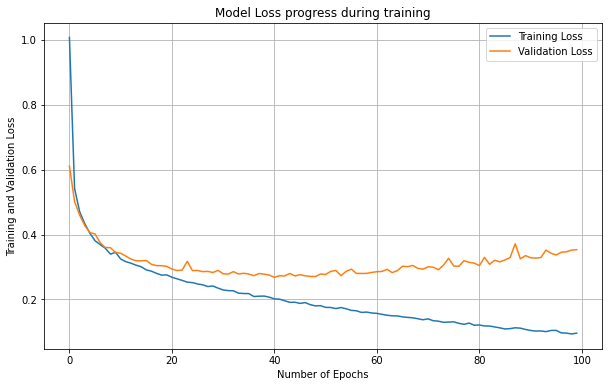

In [15]:
# Visualize the Model Loss
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title("Model Loss progress during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation Loss")
plt.legend(['Training Loss', 'Validation Loss'])

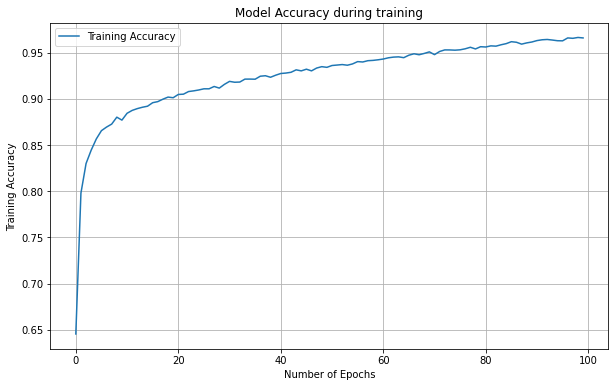

In [16]:
# Visualize the Model Accuracy
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(epochs_hist.history['accuracy'])
plt.title("Model Accuracy during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Training Accuracy")
plt.legend(['Training Accuracy'])

In [17]:
# We will run predictions using this model and come up with the test accuracy
evaluations = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy is - {evaluations[1]}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3165 - accuracy: 0.9077
Test Accuracy is - 0.9077000021934509


In [18]:
# Now we will need to get predictions on the test data
predictions = model.predict(X_test)
prediction_classes = np.argmax(predictions, axis=1)


313/313 [==============================] - 1s 1ms/step


In [19]:
print('Confusion Matrix')
print(confusion_matrix(y_test, prediction_classes))
print("\n")
print("Accuracy Score")
print(accuracy_score(y_test, prediction_classes))
print("\n")
print("Classification Report")
print(classification_report(y_test, prediction_classes))

Confusion Matrix
[[845   2  13  13   0   0 120   0   7   0]
 [  1 990   0   5   2   0   2   0   0   0]
 [ 20   0 829   9  56   1  84   0   1   0]
 [ 19  11   6 905  20   1  36   0   2   0]
 [  0   4  25  21 853   0  93   0   4   0]
 [  0   0   0   0   0 980   0  12   1   7]
 [100   3  42  24  46   0 780   0   5   0]
 [  0   0   0   0   0  11   0 943   1  45]
 [  5   2   1   1   1   1  12   1 976   0]
 [  0   0   0   0   0   2   0  21   1 976]]


Accuracy Score
0.9077


Classification Report
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1000
           1       0.98      0.99      0.98      1000
           2       0.91      0.83      0.87      1000
           3       0.93      0.91      0.92      1000
           4       0.87      0.85      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.69      0.78      0.73      1000
           7       0.97      0.94      0.95      1000
           8     